# Passos previs

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

Es carrega el fitxer guardat en el preprocessament

In [2]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df1 = pd.read_csv(mainpath + "dfFinal.csv", sep = ",")
dates = pd.read_csv(mainpath + "dates.csv", sep = ";")
df1.diaAño = df1.diaAño.asobject

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  


In [3]:
sum(df1.duplicated())

0

## Llistes segons variable

In [4]:
objs = df1.describe(include = 'object').columns.tolist()
ints = df1.describe(include = 'int64').columns.tolist()
flts = df1.describe(include = 'float64').columns.tolist()

## Funcions

In [5]:
def habitacionsPerCategoria(categoria, df):
    cat = []
    habCat = []
    pHabCat = []
    for c in categoria.unique():
        cat.append(c) ## llista amb els valors unics de la categoria
        habCat.append(sum(df[categoria==c]['NHab'])) ## suma d'habitacions
        pHabCat.append(round(sum(df[categoria==c]['NHab'])*100/sum(df['NHab']),3)) ## percentatges
    return pd.DataFrame(list(zip(cat, habCat, pHabCat)), columns = ['id', 'Total habitacions', 'Percentatge %'])


def filtroMenorQue5(lista):
    if(lista < 5):
        return True
    else:
        return False
    
    
def llistaHotel(hotel, df):
    l = list(df[df['idhotel']==hotel]['NHab'])
    return l

# Anàlisi descriptiu

## Variable objectiu

In [6]:
df1.describe(include = 'float')

,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000
mean,131.448197,131.404295,131.353334,131.457491,131.515058,131.558413,131.699337,131.800236,131.887223,131.890701,131.809109,131.816538,131.763683,131.817357,131.832852,131.792227,131.783384,131.833032,131.857602,131.917310,131.960818,131.978260,131.977338,131.878116,131.812304,131.748835,131.721124,131.682305,131.722233,131.769581,131.767964,131.737525,131.673330,131.634962,131.638935,131.655632,131.705414,131.715931,131.679004,131.645377,131.606033,131.565061,131.552670,131.551118,131.554712,131.552175,131.523347,131.491040,131.459343,131.448712,131.472721,131.478685,131.477563
std,72.537042,72.413405,72.045001,71.927486,71.775605,71.823800,71.852545,72.014377,72.284747,72.370823,72.372299,72.409366,72.357744,72.313310,72.179555,72.023012,71.984373,72.089728,72.179050,72.479470,72.680512,72.748956,72.838484,72.792033,72.761923,72.769256,72.823501,72.702226,72.958080,73.128694,73.003434,73.017446,72.922247,72.896744,72.867924,72.856838,72.823597,72.808201,72.775667,72.755926,72.733829,72.720886,72.718243,72.749320,72.750756,72.756389,72.753207,72.722315,72.737019,72.734417,72.741542,72.747899,72.738179
min,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
25%,79.038319,79.085859,79.382370,79.654545,79.786046,79.935364,80.054545,80.083186,80.054545,80.054546,80.054545,80.054545,80.054546,80.136363,80.245454,80.245454,80.323636,80.318182,80.341309,80.318182,80.363636,80.318182,80.308693,80.323636,80.318181,80.323636,80.350732,80.363636,80.323636,80.323636,80.363636,80.363818,80.363636,80.363636,80.363636,80.504544,80.545455,80.708052,80.659380,80.727272,80.713636,80.727272,80.727272,80.727272,80.727272,80.774544,80.774544,80.749999,80.745455,80.727272,80.727272,80.727272,80.727272
50%,113.953165,114.074428,114.081818,114.140266,114.138181,114.149747,114.139342,114.318182,114.138181,114.039928,113.990909,113.890909,113.890908,113.897136,113.863637,113.906952,113.990909,114.001393,113.990909,113.890909,113.890909,113.963636,113.919647,113.818183,113.790251,113.646084,113.500000,113.272728,113.194351,113.243921,113.090910,113.015152,112.954545,112.954545,112.954545,112.954545,113.061818,112.996163,112.981494,112.954545,112.909092,112.848484,112.848484,112.781939,112.772728,112.727272,112.696364,112.653031,112.553692,112.537287,112.558464,112.595041,112.595041
75%,165.453409,165.369943,165.295967,165.306819,165.253038,165.147970,165.412273,165.442067,165.508177,165.594923,165.336737,165.293655,165.197727,165.127272,165.129761,165.101685,165.090910,165.090910,165.106591,165.351134,165.454545,165.236364,165.090910,165.090910,165.054544,164.900000,164.454546,164.459092,164.4590

In [7]:
df1['NHab'].describe()

count    47630.000000
mean         9.775667
std         18.072125
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        346.000000
Name: NHab, dtype: float64

Hi ha una gran diferència entre el percentil 75 i el màxim del nombre d'habitacions reservades. Han d'haver-hi pocs casos de reserves de moltes habitacions.

#### Histogrames

Text(0.5, 1.0, "Número d'habitacions ocupades")

Text(0.5, 0, 'Habitacions')

Text(0, 0.5, 'Recompte')

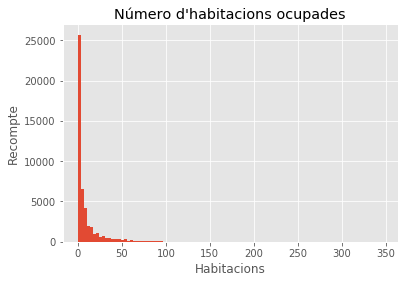

In [8]:
plt.title("Número d'habitacions ocupades")
plt.xlabel('Habitacions')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['NHab'], bins = 100))


Es veu clarament com la majoria de casos es concentren clarament en valors petits, en més de 35000 casos es reserva una sola habitació.

#### Distribució

Text(0.5, 1.0, "Distribució Número d'habitacions")

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

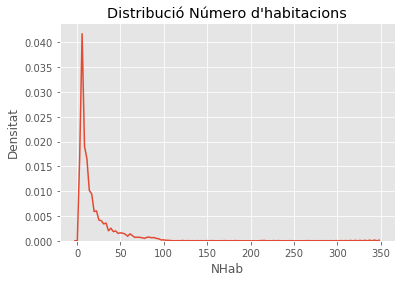

In [9]:
plt.title("Distribució Número d'habitacions")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
plt.show(sns.distplot(df1.NHab, hist = False))


##### Distribució per trimestre, comparant 2018 i 2019

In [10]:
## Afegir variable trimestre
dates = dates.rename(columns = {'date':'fechaocupacion'})
dfTrim = pd.merge(df1, dates[['fechaocupacion', 'añoTrim']])
#dfTrim.trimestre = dfTrim.trimestre.asobject

In [11]:
dfTrim.añoTrim.describe()

count      47630
unique         7
top       2018_3
freq       13863
Name: añoTrim, dtype: object

Text(0.5, 1.0, '2018 vs 2019 1r trimestre')

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

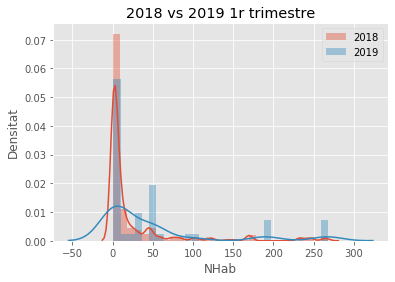

Text(0.5, 1.0, '2018 vs 2019 2n trimestre')

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

<function matplotlib.pyplot.show(*args, **kw)>

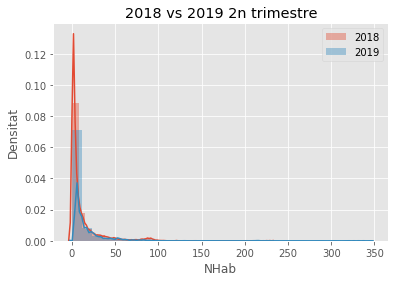

In [12]:
plt.title("2018 vs 2019 1r trimestre")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
sns.distplot(dfTrim[dfTrim['añoTrim']=='2018_1']['NHab'], label = '2018', bins = 30)
sns.distplot(dfTrim[dfTrim['añoTrim']=='2019_1']['NHab'], label = '2019', bins = 30)
plt.legend()
plt.show()

plt.title("2018 vs 2019 2n trimestre")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
sns.distplot(dfTrim[dfTrim['añoTrim']=='2018_2']['NHab'], label = '2018', bins = 30)
sns.distplot(dfTrim[dfTrim['añoTrim']=='2019_2']['NHab'], label = '2019', bins = 30)
plt.legend()
plt.show

Text(0.5, 1.0, '2018 vs 2019 3r trimestre')

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

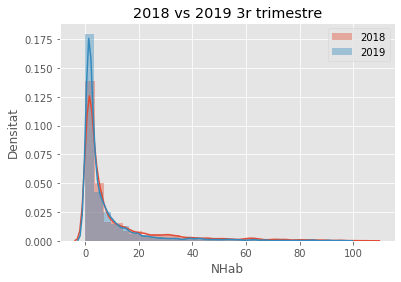

In [13]:
plt.title("2018 vs 2019 3r trimestre")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
sns.distplot(dfTrim[dfTrim['añoTrim']=='2018_3']['NHab'], label = '2018', bins = 30)
sns.distplot(dfTrim[dfTrim['añoTrim']=='2019_3']['NHab'], label = '2019', bins = 30)
plt.legend()
plt.show()

S’observen petites diferencies en els dos primers trimestres, sembla que per a l’any 2018, la variable NHab pren valors més petits. Però es comporten de manera similar en tots dos anys, havent-hi majoria de valors petits. En el 3r trimestre, per al 2019 només s'agafen les dades de juliol.

#### Boxplots

Text(0.5, 1.0, "Boxplot Número d'habitacions")

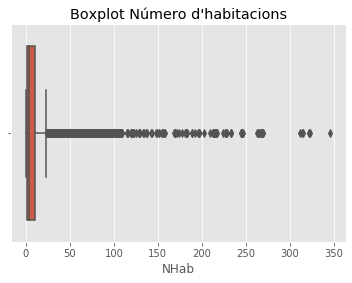

In [14]:
plt.title("Boxplot Número d'habitacions")
plt.show(sns.boxplot(x = df1['NHab']))

#### Percentatges

In [15]:
pNhab = []
## Càlcul percentatge representatiu de la mostra segons NHab
for i in range(max(df1['NHab'])):
    pNhab.append(round((df1[df1['NHab']>=i].shape[0]/df1.shape[0])*100, 2))

In [16]:
pNhabInv = []
for i in range(max(df1['NHab'])):
    pNhabInv.append(round((df1[df1['NHab']<=i].shape[0]/df1.shape[0])*100, 2))

Text(0.5, 1.0, "Percentil segons l'augment del nombre d'habitacions")

Text(0.5, 0, "Nombre d'habitacions ocupades")

Text(0, 0.5, 'Percentil')

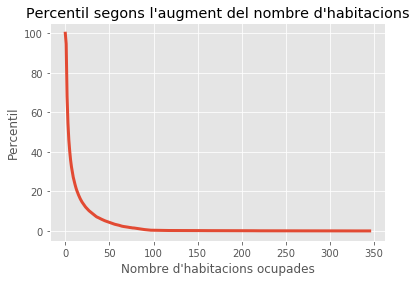

In [17]:
plt.title("Percentil segons l'augment del nombre d'habitacions")
plt.xlabel("Nombre d'habitacions ocupades")
plt.ylabel("Percentil")
plt.plot(range(max(df1['NHab'])), pNhab, linewidth = 3)

In [18]:
menor5 = filter(filtroMenorQue5, pNhab)
pNhab5 = []

for i in menor5:
    pNhab5.append(i)

Text(0.5, 1.0, "Percentil segons l'augment del nombre d'habitacions")

Text(0.5, 0, "Nombre d'habitacions ocupades")

Text(0, 0.5, 'Percentil')

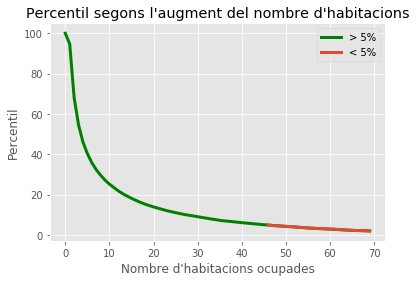

In [19]:
plt.title("Percentil segons l'augment del nombre d'habitacions")
plt.xlabel("Nombre d'habitacions ocupades")
plt.ylabel("Percentil")
plt.plot(range(70), pNhab[0:70], c = 'g', linewidth = 3, label = '> 5%')
plt.plot(range(len(pNhab) - len(pNhab5), 70), pNhab5[0:(70-(len(pNhab) - len(pNhab5)))], linewidth = 3, label = '< 5%')
##                   
plt.legend()


En color vermell, es mostren els valors per els quals el percentatge de la mostra és inferior al 5%.

In [20]:
print("Concretament, a partir de", len(pNhab) - len(pNhab5), "habitacions ocupades cap amunt, les dades representen menys d'un 5% sobre el total.")

Concretament, a partir de 46 habitacions ocupades cap amunt, les dades representen menys d'un 5% sobre el total.


## Variables categòriques

### Hotel

#### Anàlisi univariat

In [21]:
df1.idhotel.describe()

count     47630
unique        7
top         TAU
freq      12348
Name: idhotel, dtype: object

In [22]:
df1.idhotel.unique()

array(['MME', 'TOS', 'PAV', 'AVS', 'DON', 'TAU', 'SAL'], dtype=object)

Text(0.5, 1.0, 'ID hotel')

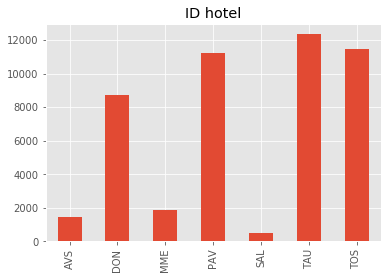

In [23]:
plt.title('ID hotel')
plt.show(df1['idhotel'].value_counts().sort_index().plot.bar())


In [24]:
h = pd.concat([df1['idhotel'].value_counts().sort_index()/len(df1)*100, 
                df1['idhotel'].value_counts().sort_index()], axis = 1)
h.columns = ['%', 'Recompte']
h.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
TAU,25.924837,12348
TOS,24.049969,11455
PAV,23.552383,11218
DON,18.360277,8745
MME,3.972286,1892
AVS,3.079992,1467
SAL,1.060256,505


L'hotel que apareix en més casos és el TAU, hi ha una gran diferencia entre els 3 que menys apareixen i la resta


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

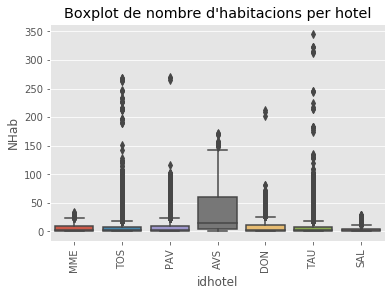

In [25]:
plt.title("Boxplot de nombre d'habitacions per hotel")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df1))

L'hotel AVS es comporta molt diferent a la resta, mentre que el percentil 75 en la resta d'hotels són aproximadament entre 4 i 10 habitacions, en aquest cas es troba al voltant de 60.

El MME i el SAL gairebé no tenen casos per sobre de 50. La resta d'hotels es comporten d'una manera similar amb la variable resposta. Tenen molts casos força superiors al percentil 75. 

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

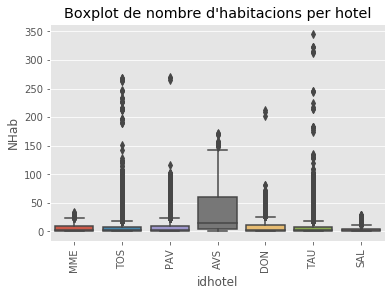

In [26]:
plt.title("Boxplot de nombre d'habitacions per hotel")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df1))

Total d'habitacions venudes per hotel.

In [27]:
habitacionsPerCategoria(df1['idhotel'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
1,TOS,113489,24.374
2,PAV,107041,22.989
5,TAU,103879,22.310
4,DON,79029,16.973
3,AVS,48197,10.351
0,MME,11960,2.569
6,SAL,2020,0.434


Tot i que l'AVS és l'hotel que menys apareix en el dataset, no es el que menys ven, el total d'habitacions venudes per aquest hotel representa al voltant d'un 10% de les habitacions venudes.

El MME i el SAL són els que menys habitacions vénen amb diferència, mentre que el TOS, el PAV i el TAU vénen un percentatge força similar.

### Client

#### Anàlisi univariat

In [28]:
df1.idcliente.describe()

count     47630
unique        4
top       Otros
freq      21050
Name: idcliente, dtype: object

Text(0.5, 1.0, 'ID client')

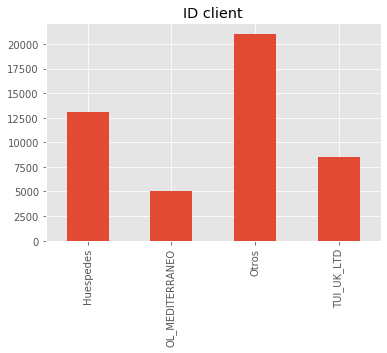

In [29]:
plt.title('ID client')
plt.show(df1['idcliente'].value_counts().sort_index().plot.bar())

In [30]:
cl = pd.concat([df1['idcliente'].value_counts().sort_index()/len(df1)*100, 
                df1['idcliente'].value_counts().sort_index()], axis = 1)
cl.columns = ['%', 'Recompte']
cl.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
Otros,44.194835,21050
Huespedes,27.516271,13106
TUI_UK_LTD,17.778711,8468
OL_MEDITERRANEO,10.510183,5006


Les reserves fetes des de les agències TUI UK LTD i OLIMPIA MEDITERRANEO suposen gairebé un 27% de les dades, mentre que les fetes directament pels hostes suposen un altre 27%. La majoria de casos són reserves fetes a partir d'altres agències clients.

#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

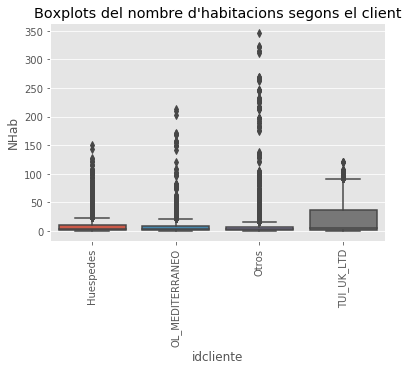

In [31]:
plt.title("Boxplots del nombre d'habitacions segons el client")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df1))

Destaca el comportament de l'agència TUI UK LTD amb la variable resposta. El percentil 75 arriba fins al voltant de les 40 habitacions, no obstant, el cas màxim d'habitacions reservades des d'aquesta empresa no arriba a les 150 habitacions.

##### Comportament idhotel amb idcliente

In [32]:
hotelcl = pd.crosstab(df1.idhotel, df1.idcliente, margins = True, margins_name = 'Total')
hotelcl

idcliente,Huespedes,OL_MEDITERRANEO,Otros,TUI_UK_LTD,Total
idhotel,,,,,
AVS,58,46,560,803,1467
DON,1994,1080,3901,1770,8745
MME,731,131,798,232,1892
PAV,3629,1584,4804,1201,11218
SAL,123,54,275,53,505
TAU,3198,1088,5942,2120,12348
TOS,3373,1023,4770,2289,11455
Total,13106,5006,21050,8468,47630


La majoria d'habitacions de l'hotel AVS les reserven mitjançant l'agència TUI UK LTD, això quadra amb el que s'ha vist, ja que tant l'hotel com l'agència en qüestió acostumen a vendre habitacions en 'packs'.

### Tipus Habitació


#### Anàlisi univariat

In [33]:
df1.idtipohab.describe()
hab = pd.concat([df1['idtipohab'].value_counts().sort_index()/len(df1)*100, 
                df1['idtipohab'].value_counts().sort_index()], axis = 1)
hab.columns = ['%', 'Recompte']
hab.sort_values(by=['Recompte'], ascending = False)

count     47630
unique        6
top         DBL
freq      28447
Name: idtipohab, dtype: object

,%,Recompte
DBL,59.724963,28447
FAM,23.142977,11023
SUI,7.774512,3703
PREM,5.775772,2751
IND,3.579677,1705
APART,0.002100,1


S'ha de decidir que fer amb el cas que correspon al tipus APART, ja que al només haver-hi un és susceptible de ser eliminat o ajuntat amb altres tipus d'habitació.
Es mira en detall quin cas és i es decideix si s'elimina o s'ajunta amb un altre tipus d'habitació.

In [34]:
df1[df1.idtipohab=='APART']

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
25858,AVS,2019-04-27,Huespedes,APART,MP,DESCONOCIDO,DESCONOCIDO,ES,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,118


En l'anàlisi bivariat entre el tipus d'habitació i l'hotel es podrà veure com l'hotel 'AVS', que és l'hotel que ha venut aquesta habitació, només venen suites, per tant, es transformarà en suite. 

In [35]:
df1.idtipohab = df1.idtipohab.replace('APART', 'SUI')


Text(0.5, 1.0, "Tipus d'habitació")

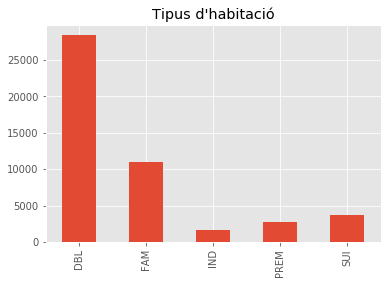

In [36]:
plt.title("Tipus d'habitació")
plt.show(df1['idtipohab'].value_counts().sort_index().plot.bar())

In [37]:
hab = pd.concat([df1['idtipohab'].value_counts().sort_index()/len(df1)*100, 
                df1['idtipohab'].value_counts().sort_index()], axis = 1)
hab.columns = ['%', 'Recompte']
hab.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DBL,59.724963,28447
FAM,23.142977,11023
SUI,7.776611,3704
PREM,5.775772,2751
IND,3.579677,1705


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

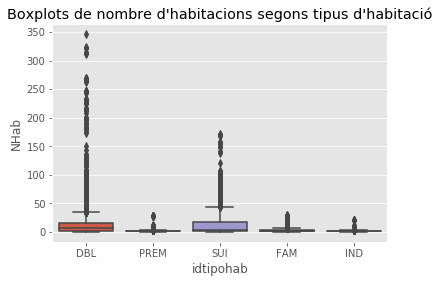

In [38]:
plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df1))

In [39]:
habitacionsPerCategoria(df1['idtipohab'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,DBL,371555,79.799
2,SUI,60564,13.007
3,FAM,25556,5.489
1,PREM,5140,1.104
4,IND,2800,0.601


##### Comportament de idtipohab amb idhotel

S'analitza el tipus d'habitació que ven cada hotel

In [40]:
hotelHab = pd.crosstab(df1.idhotel, df1.idtipohab, margins = True, margins_name = 'Total')
hotelHab

idtipohab,DBL,FAM,IND,PREM,SUI,Total
idhotel,,,,,,
AVS,0,0,0,0,1467,1467
DON,5413,3148,37,147,0,8745
MME,1735,157,0,0,0,1892
PAV,6770,3069,372,991,16,11218
SAL,505,0,0,0,0,505
TAU,7172,3494,816,0,866,12348
TOS,6852,1155,480,1613,1355,11455
Total,28447,11023,1705,2751,3704,47630


In [81]:
print("L'hotel", hotelHab[4:5].index.tolist(), "i el", hotelHab[2:3].index.tolist(), "gairebé només venen habitacions dobles, mentre que el", hotelHab[0:1].index.tolist(), "només ven Suites")

L'hotel ['SAL'] i el ['MME'] gairebé només venen habitacions dobles, mentre que el ['AVS'] només ven Suites


### Règim

#### Anàlisi univariat

In [42]:
df1.idregimen.describe()

count     47630
unique        5
top          MP
freq      17334
Name: idregimen, dtype: object

Text(0.5, 1.0, 'Règim')

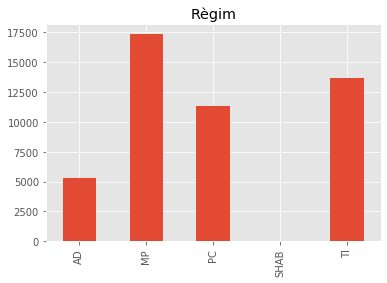

In [43]:
plt.title('Règim')
plt.show(df1['idregimen'].value_counts().sort_index().plot.bar())

In [44]:
r = pd.concat([df1['idregimen'].value_counts().sort_index()/len(df1)*100, 
                df1['idregimen'].value_counts().sort_index()], axis = 1)
r.columns = ['%', 'Recompte']
r.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
MP,36.393030,17334
TI,28.662608,13652
PC,23.772832,11323
AD,11.150535,5311
SHAB,0.020995,10


El règim més observat és el de mitja pensió, mentre que només s'hi veuen 10 casos on es demani només habitació.

#### Anàlisi bivariat 

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

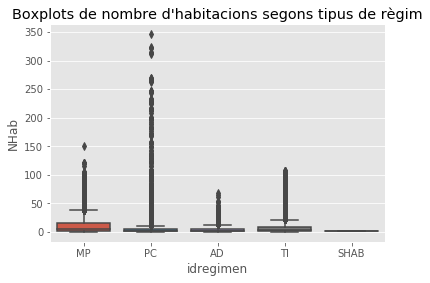

In [45]:
plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df1))

In [46]:
habitacionsPerCategoria(df1['idregimen'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,MP,211617,45.449
3,TI,145416,31.231
1,PC,82545,17.728
2,AD,26027,5.590
4,SHAB,10,0.002


### Segment

#### Anàlisi univariat

In [47]:
df1.idsegmento.describe()

count           47630
unique              2
top       DESCONOCIDO
freq            37969
Name: idsegmento, dtype: object

Text(0.5, 1.0, 'Segment')

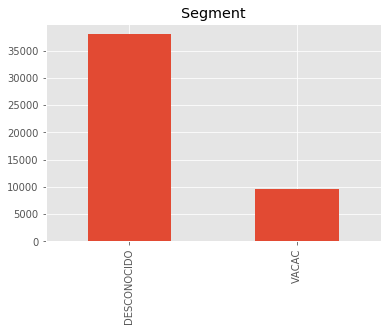

In [48]:
plt.title("Segment")
plt.show(df1['idsegmento'].value_counts().sort_index().plot.bar())

In [49]:
s = pd.concat([df1['idsegmento'].value_counts().sort_index()/len(df1)*100, 
                df1['idsegmento'].value_counts().sort_index()], axis = 1)
s.columns = ['%', 'Recompte']
s.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DESCONOCIDO,79.716565,37969
VACAC,20.283435,9661


La gran majoria d’observacions tenen un segment desconegut, i només un 20% són provinent d’un segment vacacional. Sembla estrany que hi hagin tant poques observacions provinents d’assumptes vacacionals quan, precisament, aquests tipus d’hotels estan especialment fets per a estades vacacionals. Això podria ser degut a una mala recollida de dades i ja es veurà quina decisió es pren amb aquesta variable a l’hora de definir les variables predictores finals per al model.

#### Anàlisi bivariat

In [50]:
habitacionsPerCategoria(df1['idsegmento'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,DESCONOCIDO,307975,66.144
1,VACAC,157640,33.856


Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

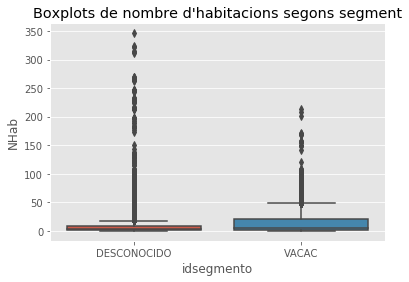

In [51]:
plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df1))

### Canal

#### Anàlisi univariat

In [52]:
df1.id_canal.describe()

count           47630
unique              5
top       DESCONOCIDO
freq            42848
Name: id_canal, dtype: object

Text(0.5, 1.0, 'Canal')

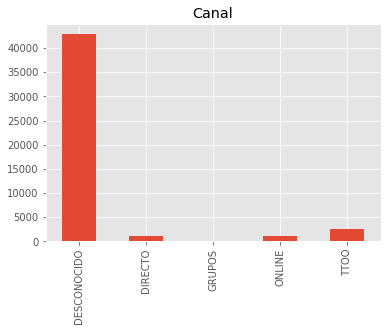

In [53]:
plt.title("Canal")
plt.show(df1['id_canal'].value_counts().sort_index().plot.bar())

In [54]:
c = pd.concat([df1['id_canal'].value_counts().sort_index()/len(df1)*100, 
               df1['id_canal'].value_counts().sort_index()], axis = 1)
c.columns = ['%', 'Recompte']
c.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DESCONOCIDO,89.960109,42848
TTOO,5.313878,2531
ONLINE,2.395549,1141
DIRECTO,2.259080,1076
GRUPOS,0.071384,34


El cas d’aquesta variable és semblant al de la variable idsegmento, sembla que les dades no s’han recollit correctament, ja que gairebé un 90% de les observacions és de caràcter desconegut. 


#### Anàlisi bivariat

In [55]:
habitacionsPerCategoria(df1['id_canal'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,DESCONOCIDO,430382,92.433
3,TTOO,28978,6.224
2,ONLINE,3011,0.647
1,DIRECTO,2298,0.494
4,GRUPOS,946,0.203


Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

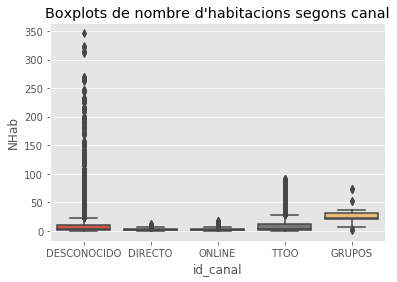

In [56]:
plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df1))

El comportament d’aquesta variable respecte a la objectiu és semblant per a tots els nivells excepte per als GRUPOS, on més del 75% de les dades d’aquest nivell corresponen a valors força alts de NHab.

### País client

#### Anàlisi univariat

In [57]:
df1.idpais_cliente.describe()

count     47630
unique        8
top          ES
freq      24888
Name: idpais_cliente, dtype: object

Text(0.5, 1.0, "País de l'agència client")

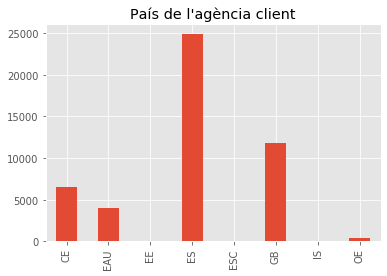

In [58]:
plt.title("País de l'agència client")
plt.show(df1['idpais_cliente'].value_counts().sort_index().plot.bar())

In [59]:
pc = pd.concat([df1['idpais_cliente'].value_counts().sort_index()/len(df1)*100, 
           df1['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc.columns = ['%', 'Recompte']
pc.sort_values(by = 'Recompte', ascending = False)

,%,Recompte
ES,52.252782,24888
GB,24.778501,11802
CE,13.655259,6504
EAU,8.337182,3971
OE,0.772622,368
EE,0.134369,64
ESC,0.048289,23
IS,0.020995,10


#### Anàlisi bivariat

In [60]:
habitacionsPerCategoria(df1['idpais_cliente'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,ES,206434,44.336
3,GB,196131,42.123
1,CE,44698,9.600
2,EAU,13572,2.915
4,OE,3826,0.822
5,ESC,498,0.107
7,IS,260,0.056
6,EE,196,0.042


Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

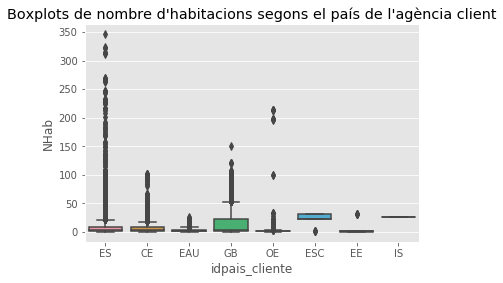

In [61]:
plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df1))

En més de la meitat de les observacions, el país d’origen de l’agència client és Espanya. Té certa lògica ja que els hotels es troben a Catalunya. 
Es veuen comportaments diferents segons els països d’origen. Destaquen els casos de Gran Bretanya, Escandinàvia i Islandia.


### Data

#### Anàlisi univariat

In [62]:
df1.diaAño.describe()

count     47630
unique      261
top         187
freq        415
Name: diaAño, dtype: int64

Text(0.5, 1.0, "Distribució dels dies de l'any")

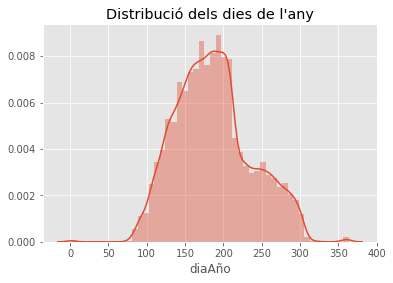

In [63]:
plt.title("Distribució dels dies de l'any")
sns.distplot(df1.diaAño)

In [64]:
d = pd.concat([df1['diaAño'].value_counts().sort_index()/len(df1)*100, 
           df1['diaAño'].value_counts().sort_index()], axis = 1)
d.columns = ['%', 'Recompte']
d

,%,Recompte
1,0.044090,21
2,0.018896,9
75,0.002100,1
76,0.006299,3
77,0.006299,3
...,...,...
360,0.018896,9
361,0.018896,9
362,0.018896,9
363,0.018896,9


#### Anàlisi bivariat

Text(0.5, 1.0, "Nombre d'habitacions segons el dia de l'any")

Text(0.5, 0, "Dia de l'any")

Text(0, 0.5, 'Nº habitacions reservades')

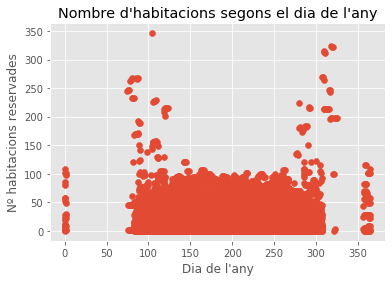

In [65]:
plt.title("Nombre d'habitacions segons el dia de l'any")
plt.xlabel("Dia de l'any")
plt.ylabel("Nº habitacions reservades")
plt.scatter(df1['diaAño'],df1['NHab'])

## Variables numèriques

### Preu mig

#### Anàlisi univariat

In [66]:
df1.describe()

,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000
mean,9.775667,9.622864,9.531031,9.415410,9.175331,8.914886,8.677724,8.442326,8.204976,7.979656,7.777745,7.591644,7.422108,7.292463,7.171426,7.015578,6.866660,6.709616,6.518098,6.334180,6.149633,5.935335,5.722066,5.540794,5.365421,5.187382,5.001638,4.843859,4.676716,4.506571,4.322402,4.200189,4.076422,3.940101,3.808041,3.679467,3.536679,3.408104,3.278837,3.164539,3.041256,2.937980,2.826013,2.717363,2.600525,2.483015,2.367290,2.231787,2.085828,1.936637,1.752908,1.550535,1.324522,131.448197,131.404295,131.353334,131.457491,131.515058,131.558413,131.699337,131.800236,131.887223,131.890701,131.809109,131.816538,131.763683,131.817357,131.832852,131.792227,131.783384,131.833032,131.857602,131.917310,131.960818,131.978260,131.977338,131.878116,131.812304,131.748835,131.721124,131.682305,131.722233,131.769581,131.767964,131.737525,131.673330,131.634962,131.638935,131.655632,131.705414,131.715931,131.679004,131.645377,131.606033,131.565061,131.552670,131.551118,131.554712,131.552175,131.523347,131.491040,131.459343,131.448712,131.472721,131.478685,131.477563
std,18.072125,17.967986,17.413474,17.129856,17.081146,17.080149,17.175535,17.248968,17.226890,17.140615,17.108430,17.113698,17.171504,17.306408,17.494873,17.496612,17.471529,17.452350,17.406240,17.331514,17.157436,16.890408,16.578920,16.383344,16.152014,15.979200,15.700599,15.507883,15.266284,14.975708,14.610915,14.432466,14.289004,14.070137,13.777481,13.537180,13.184822,12.828262,12.445226,12.142252,11.793388,11.504943,11.187738,10.879682,10.543458,10.192654,9.791587,9.289027,8.691982,8.105719,7.427681,6.696003,5.862117,72.537042,72.413405,72.045001,71.927486,71.775605,71.823800,71.852545,72.014377,72.284747,72.370823,72.372299,72.409366,72.357744,72.313310,72.179555,72.023012,71.984373,72.089728,72.179050,72.479470,72.680512,72.748956,72.838484,72.792033,72.761923,72.769256,72.823501,72.702226,72.958080,73.128694,73.003434,73.017446,72.922247,72.896744,72.867924,72.856838,72.823597,72.808201,72.775667,72.755926,72.733829,72.720886,72.718243,72.749320,72.750756,72.756389,72.753207,72.722315,72.737019,72.734417,72.741542,72.747899,72.738179
min,0.000000,0.000000,0.000000

In [67]:
df1['PreuHab'].describe()

count    47630.000000
mean       131.448197
std         72.537042
min         40.000000
25%         79.038319
50%        113.953165
75%        165.453409
max        713.005287
Name: PreuHab, dtype: float64

Text(0.5, 1.0, 'Boxplot del preu mig')

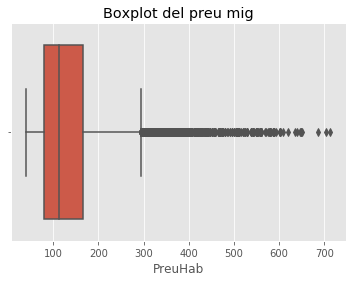

In [68]:
plt.title("Boxplot del preu mig")
plt.show(sns.boxplot(df1['PreuHab']))

Text(0.5, 1.0, 'Preu mig habitació')

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Recompte')

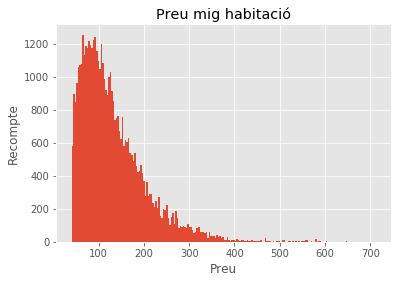

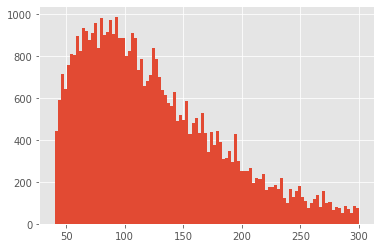

In [69]:
plt.title("Preu mig habitació")
plt.xlabel('Preu')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['PreuHab'], bins = 200))
plt.show(plt.hist(df1[df1['PreuHab'] <300]['PreuHab'], bins = 100))

In [70]:
pPhab = []
## Càlcul percentatge representatiu de la mostra segons NHab
for i in range(1700):
    pPhab.append(round((df1[df1['PreuHab']>=i].shape[0]/df1.shape[0])*100, 2))

Text(0.5, 1.0, 'Percentil segons el preu de la reserva')

Text(0.5, 0, 'Preu de la reserva')

Text(0, 0.5, 'Percentil')

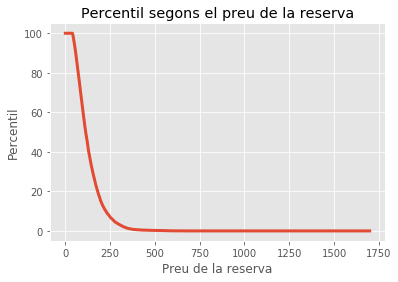

In [71]:
plt.title("Percentil segons el preu de la reserva")
plt.xlabel("Preu de la reserva")
plt.ylabel("Percentil")
plt.plot(range(1700), pPhab, linewidth = 3)

In [72]:
menorPreu5 = filter(filtroMenorQue5, pPhab)
pPhab5 = []

for i in menorPreu5:
    pPhab5.append(i)

Text(0.5, 1.0, 'Percentil segons el preu de la reserva')

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Percentil')

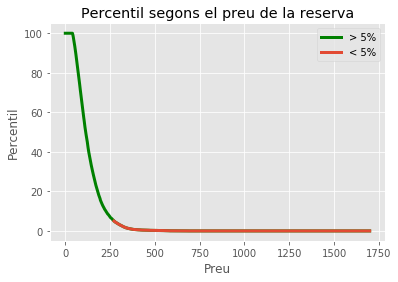

In [73]:
plt.title("Percentil segons el preu de la reserva")
plt.xlabel("Preu")
plt.ylabel("Percentil")
plt.plot(range(1700), pPhab, c = 'g', linewidth = 3, label = '> 5%')
plt.plot(range(len(pPhab) - len(pPhab5), 1700), pPhab5[0:(1700-(len(pPhab) - len(pPhab5)))], linewidth = 3, label = '< 5%')
plt.legend()

In [74]:
print("Si només s'agafen dades a partir de", len(pPhab) - len(pPhab5), "euros, les dades que s'agafin representaran menys d'un 5% del conjunt de dades original.")

Si només s'agafen dades a partir de 272 euros, les dades que s'agafin representaran menys d'un 5% del conjunt de dades original.


In [75]:
df1.describe()

,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000
mean,9.775667,9.622864,9.531031,9.415410,9.175331,8.914886,8.677724,8.442326,8.204976,7.979656,7.777745,7.591644,7.422108,7.292463,7.171426,7.015578,6.866660,6.709616,6.518098,6.334180,6.149633,5.935335,5.722066,5.540794,5.365421,5.187382,5.001638,4.843859,4.676716,4.506571,4.322402,4.200189,4.076422,3.940101,3.808041,3.679467,3.536679,3.408104,3.278837,3.164539,3.041256,2.937980,2.826013,2.717363,2.600525,2.483015,2.367290,2.231787,2.085828,1.936637,1.752908,1.550535,1.324522,131.448197,131.404295,131.353334,131.457491,131.515058,131.558413,131.699337,131.800236,131.887223,131.890701,131.809109,131.816538,131.763683,131.817357,131.832852,131.792227,131.783384,131.833032,131.857602,131.917310,131.960818,131.978260,131.977338,131.878116,131.812304,131.748835,131.721124,131.682305,131.722233,131.769581,131.767964,131.737525,131.673330,131.634962,131.638935,131.655632,131.705414,131.715931,131.679004,131.645377,131.606033,131.565061,131.552670,131.551118,131.554712,131.552175,131.523347,131.491040,131.459343,131.448712,131.472721,131.478685,131.477563
std,18.072125,17.967986,17.413474,17.129856,17.081146,17.080149,17.175535,17.248968,17.226890,17.140615,17.108430,17.113698,17.171504,17.306408,17.494873,17.496612,17.471529,17.452350,17.406240,17.331514,17.157436,16.890408,16.578920,16.383344,16.152014,15.979200,15.700599,15.507883,15.266284,14.975708,14.610915,14.432466,14.289004,14.070137,13.777481,13.537180,13.184822,12.828262,12.445226,12.142252,11.793388,11.504943,11.187738,10.879682,10.543458,10.192654,9.791587,9.289027,8.691982,8.105719,7.427681,6.696003,5.862117,72.537042,72.413405,72.045001,71.927486,71.775605,71.823800,71.852545,72.014377,72.284747,72.370823,72.372299,72.409366,72.357744,72.313310,72.179555,72.023012,71.984373,72.089728,72.179050,72.479470,72.680512,72.748956,72.838484,72.792033,72.761923,72.769256,72.823501,72.702226,72.958080,73.128694,73.003434,73.017446,72.922247,72.896744,72.867924,72.856838,72.823597,72.808201,72.775667,72.755926,72.733829,72.720886,72.718243,72.749320,72.750756,72.756389,72.753207,72.722315,72.737019,72.734417,72.741542,72.747899,72.738179
min,0.000000,0.000000,0.000000

El preu mig d’una habitació és de 136 euros, mentre que els mínims i màxims coincideixen amb el punt de tall establert en el preprocessament. 
Hi ha una gran distància entre el preu del percentil 75 i el màxim, la majoria de preus ronden entre els 80 i els 175 euros aproximadament. Més enllà dels 300 euros són preus poc freqüents com es veu en el diagrama de caixa.


#### Anàlisi bivariat

Text(0.5, 1.0, "Nombre d'habitacions segons el preu")

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Nº habitacions reservades')

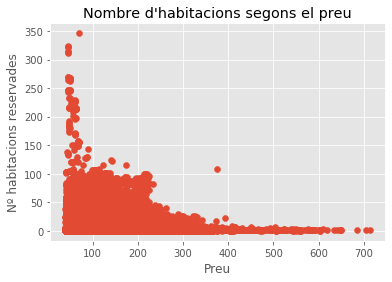

In [76]:
plt.title("Nombre d'habitacions segons el preu")
plt.xlabel("Preu")
plt.ylabel("Nº habitacions reservades")
plt.scatter(df1['PreuHab'], df1['NHab'])

In [77]:
np.corrcoef(df1['PreuHab'], df1['NHab'])[1][0]

-0.1504576317509891

In [78]:
print("La correlació entre les dues variables és", round(np.corrcoef(df1['PreuHab'], df1['NHab'])[1][0], 4))

La correlació entre les dues variables és -0.1505


Lo qual indica que, lleugerament, com més alt és el número d’habitacions, més baix és el preu. Té cert sentit, ja que una reserva gran d’habitacions pot comportar descomptes.

In [79]:
dfextNH = df1[df1['NHab']>46]
dfextP = df1[df1['PreuHab']>272]
dfextNH.to_csv(mainpath + 'dfextNH.csv', header = True, index = None)
dfextP.to_csv(mainpath + 'dfextP.csv', header = True, index = None)
dfcsv = df1.to_csv(mainpath + 'dfFE.csv', header = True, index = None)

In [80]:
df1.head()
df1.shape

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
0,MME,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,87
1,TOS,2018-03-28,Huespedes,DBL,PC,DESCONOCIDO,DESCONOCIDO,ES,25,25,22,18,19,12,10,7,6,5,5,4,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.694182,97.966909,100.581405,99.053030,98.455981,98.648485,95.496363,102.407792,119.475758,115.863636,115.863636,120.420454,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,87
2,TOS,2018-03-28,Huespedes,DBL,AD,DESCONOCIDO,DESCONOCIDO,ES,5,2,2,2,1,2,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.461817,73.763636,73.763636,73.763636,85.218182,81.218182,85.218182,71.672727,71.672727,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,87
3,TOS,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,18,11,10,8,8,15,13,12,12,11,10,10,10,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.157831,83.974798,80.664096,74.501712,74.501712,76.577249,74.606971,74.203006,74.203006,80.948734,80.558601,80.558601,80.558601,88.827272,88.827272,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,87
4,TOS,2018-03-28,Huespedes,PREM,PC,DESCONOCIDO,DESCONOCIDO,ES,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,1

(47630, 115)